In [2]:
#data 2013-0208 2018-02-07

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('./all_stocks_5yr.csv')

In [4]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
data['%'] = round(((data.close - data.open)/data.open*100.0), 2) 

#data['money_volume'] = (data.close + data.open)*data.volume/2.0

In [7]:
data.head()

,date,open,high,low,close,volume,Name,%
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.12
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.89
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.25
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.52
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.36


In [8]:
data.count()

date      619040
open      619029
high      619032
low       619032
close     619040
volume    619040
Name      619040
%         619029
dtype: int64

In [9]:
missing_values = []
missing_values = data[data.isnull().any(axis=1) == True]
missing_values

,date,open,high,low,close,volume,Name,%
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF,NaN
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR,NaN
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR,NaN
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES,NaN
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV,NaN
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O,NaN
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O,NaN
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN,NaN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA,NaN
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX,NaN


In [10]:
data.dropna(inplace=True)

In [11]:
missing_values = []
missing1_values = data[data.isnull().any(axis=1) == True]
missing1_values

,date,open,high,low,close,volume,Name,%


In [12]:
data.groupby('Name')['volume'].sum().sort_values(ascending = False).head()

Name
BAC     117884953591
AAPL     68046305767
GE       53023644686
F        43388129992
FB       43258314899
Name: volume, dtype: int64

In [13]:
data_BAC = data[data.Name == 'BAC']

In [14]:
# pip install mpl_finance 
# install library

In [15]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

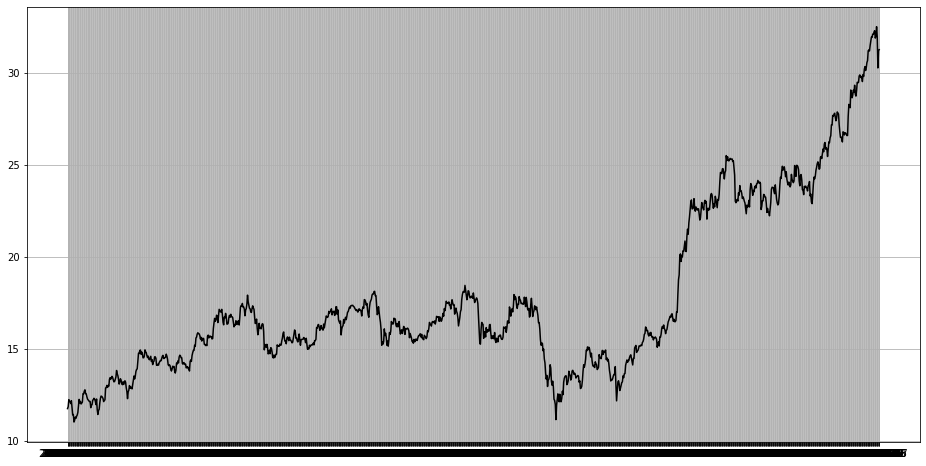

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,sharex=True,figsize=(16,8))
plt.plot(data_BAC['date'], data_BAC['close'], c='black')
plt.grid()
plt.show()

In [17]:
data_BAC = data_BAC[['date', 'open', 'high', 'low', 'close']][:200] # drop over columns
data_BAC.head(3)

,date,open,high,low,close
72870,2013-02-08,11.86,11.90,11.72,11.760
72871,2013-02-11,11.73,11.90,11.67,11.860
72872,2013-02-12,11.87,12.34,11.78,12.245


In [18]:
data_BAC['date'] = data_BAC['date'].map(mdates.datestr2num) # convert date from str to float64 type

In [19]:
data_BAC.head(3)

,date,open,high,low,close
72870,734907.0,11.86,11.90,11.72,11.760
72871,734910.0,11.73,11.90,11.67,11.860
72872,734911.0,11.87,12.34,11.78,12.245


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


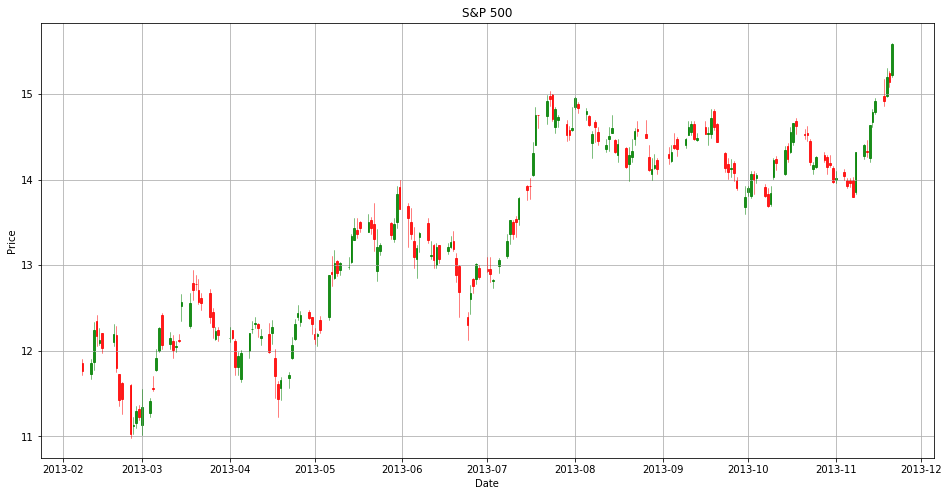

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1,sharex=True,figsize=(16,8))

# converts raw mdate numbers to dates
ax.xaxis_date()
plt.xlabel('Date')

candlestick_ohlc(ax, data_BAC.values, width=0.6, colorup='g', colordown='r', alpha=0.8)

plt.ylabel('Price')
plt.title('S&P 500')
plt.grid()
plt.show()

In [21]:
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline()

In [22]:
data_BAC.iplot(kind='line', x='date', xTitle='Tenure', color='red',
           yTitle='close', title='Avg. Churn Rate by Tenure')

In [23]:
data_GE = data[data.Name == 'GE']
data_GE.head(3)

,date,open,high,low,close,volume,Name,%
242754,2013-02-08,22.50,22.56,22.45,22.50,24424506,GE,0.00
242755,2013-02-11,22.49,22.51,22.35,22.45,19738628,GE,-0.18
242756,2013-02-12,22.48,22.65,22.48,22.58,34139526,GE,0.44


In [29]:
data_GE.iplot(kind='line', x='date', xTitle='Date', color='red',
           yTitle='Сlose', title='GE')

In [25]:
# visualisations

In [30]:
names = pd.read_csv('./names.csv')
names.dtypes

Symbol        object
Name          object
Sector        object
Market Cap     int64
dtype: object

In [31]:
names.head(3)

,Symbol,Name,Sector,Market Cap
0,MMM,3M Company,Industrials,138721055226
1,AOS,A.O. Smith Corp,Industrials,10783419933
2,ABT,Abbott Laboratories,Health Care,102121042306


In [32]:
colnames = ['Name','full_name','sector', 'market cap']
names.columns = colnames
names.head(3)

,Name,full_name,sector,market cap
0,MMM,3M Company,Industrials,138721055226
1,AOS,A.O. Smith Corp,Industrials,10783419933
2,ABT,Abbott Laboratories,Health Care,102121042306


In [33]:
full_stock = pd.merge(data, names, how='left', on=['Name'])
full_stock.head(3)

,date,open,high,low,close,volume,Name,%,full_name,sector,market cap
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.12,American Airlines Group,Industrials,24594852352
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.89,American Airlines Group,Industrials,24594852352
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.25,American Airlines Group,Industrials,24594852352


In [34]:
missing_values1 = []
missing1_values1 = full_stock[full_stock.isnull().any(axis=1) == True]
missing1_values1.head()

,date,open,high,low,close,volume,Name,%,full_name,sector,market cap


In [35]:
full_stock.dropna(inplace=True)

In [36]:
missing_values2 = []
missing1_values2 = full_stock[full_stock.isnull().any(axis=1) == True]
missing1_values2

,date,open,high,low,close,volume,Name,%,full_name,sector,market cap


In [37]:
full_stock.head()

,date,open,high,low,close,volume,Name,%,full_name,sector,market cap
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.12,American Airlines Group,Industrials,24594852352
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.89,American Airlines Group,Industrials,24594852352
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.25,American Airlines Group,Industrials,24594852352
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.52,American Airlines Group,Industrials,24594852352
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.36,American Airlines Group,Industrials,24594852352


In [38]:
#full_stock.groupby('sector')['Name'].count()
full_stock.groupby('sector')['Name'].nunique().sort_values(ascending  = False) # number of companies per sector

sector
Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Name, dtype: int64

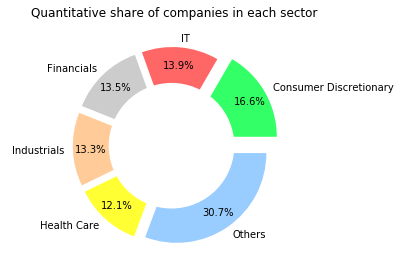

In [39]:
labels = ['Consumer Discretionary', 'IT', 'Financials', 'Industrials', 'Health Care', 'Others']
sizes = [84, 70, 68, 67, 61, 155]
explode = (0.2, 0.1, 0.1, 0.1, 0.1, 0.1) 
colors = ['#33ff66','#ff6666','#cccccc','#ffcc99', '#ffff33', '#99ccff']
#colors = ['red','green','yellow','blue', 'orange', 'brown']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors,
       pctdistance=0.8) 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Quantitative share of companies in each sector', pad=20)
#ax1.set(aspect="equal", title='Quantitative share of companies in each sector')
plt.show()

In [40]:
full_stock.groupby('sector')['market cap'].unique() # all market caps in each sector

sector
Consumer Discretionary        [8123611867, 685873374731, 24906530300, 199220...
Consumer Staples              [23594770663, 5498033502, 14379717835, 1183896...
Energy                        [15696449735, 15066280977, 32129091747, 329957...
Financials                    [33422948000, 54360073164, 4653993594, 1196848...
Health Care                   [181386347059, 20587704101, 102121042306, 5919...
Industrials                   [24594852352, 7903173734, 7599609494, 17139651...
Information Technology        [809508034020, 98765855553, 94550214268, 31811...
Materials                     [11782151266, 34638387128, 10104814319, 137676...
Real Estate                   [6156884142, 59213892640, 12043374429, 2185654...
Telecommunication Services            [18237196861, 226713270000, 208092277044]
Utilities                     [12905744906, 31701916517, 6920851212, 1390614...
Name: market cap, dtype: object

In [41]:
full_stock.drop_duplicates('market cap').groupby('sector').agg(sum).reset_index().sort_values(by='market cap', ascending  = False) # market cap per sector

,sector,open,high,low,close,volume,%,market cap
6,Information Technology,3821.4187,3866.0890,3781.6965,3823.9542,692574153,31.59,6727121800912
3,Financials,3262.7006,3289.7632,3234.5082,3268.0167,546717145,22.77,3442649464852
4,Health Care,3869.5281,3918.0364,3850.3379,3894.7915,244090032,37.22,3244359043367
0,Consumer Discretionary,5657.6426,5736.5100,5634.5855,5701.9747,341771575,60.33,3213562747315
5,Industrials,3993.0622,4034.6157,3970.8369,4003.9918,204027656,20.13,2411541173034
1,Consumer Staples,1706.4433,1720.8342,1698.6818,1709.4883,174360961,4.10,2087076388082
2,Energy,1973.2200,2004.0940,1968.0540,1995.5350,141681040,33.71,1357313712749
7,Materials,1613.5300,1627.4219,1606.4365,1623.0020,56093373,13.50,692300259151
8,Real Estate,2285.0300,2310.7402,2278.0384,2304.9600,60142143,25.67,625315677562
10,Utilities,1182.5400,1185.5250,1174.5802,1183.3800,73414659,1.16,611632638471


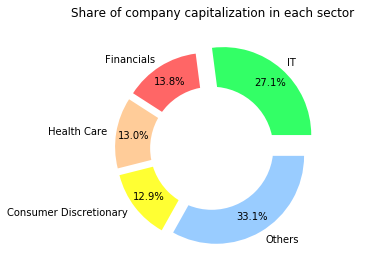

In [42]:
# share of company capitalization in each sector
labels = ['IT', 'Financials', 'Health Care', 'Consumer Discretionary', 'Others']
sizes = [6727121800912, 3442649464852, 3244359043367, 3213562747315, 8238222592954]
explode = (0.2, 0.1, 0.1, 0.1, 0.1) 
colors = ['#33ff66','#ff6666','#ffcc99', '#ffff33', '#99ccff']
#colors = ['red','green','yellow','blue', 'orange', 'brown']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors,
       pctdistance=0.8) 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Share of company capitalization in each sector', pad=20)
plt.show()

In [43]:
a = 18237196861+ 226713270000 + 208092277044 # check of result on Telecommunication Services [18237196861, 226713270000, 208092277044]
a

453042743905

In [44]:
# Top 3 companies in each sector

In [45]:
# Top 10 companies in S&P 500

In [46]:
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline()

In [47]:
names.head(2)

,Name,full_name,sector,market cap
0,MMM,3M Company,Industrials,138721055226
1,AOS,A.O. Smith Corp,Industrials,10783419933


In [48]:
top_10 = names.sort_values(by='market cap', ascending  = False).head(10)
top_10_new = top_10.drop(['Name', 'sector'], axis=1)
top_10_new
top_20 = names.sort_values(by='market cap', ascending  = False).head(20)
top_20_new = top_20.drop(['Name', 'sector'], axis=1)
top_20_new.head(2)

,full_name,market cap
51,Apple Inc.,809508034020
27,Alphabet Inc Class A,733823966137


In [49]:
#data = df.groupby('PaymentMethod', as_index=False).agg({'ChurnBinary':'mean'})

#data.reset_index(level = 0, inplace = True)

top_10_new.iplot(kind='bar', x='full_name', xTitle='company', color='green',
           yTitle='market cap', title='Top10')

In [50]:
top_20_new.iplot(kind='bar', x='full_name', xTitle='company', color='green',
           yTitle='market cap', title='Top20')

In [51]:
aa = names.sort_values(by='market cap', ascending  = False)[:10]
cc = names.sort_values(by='market cap', ascending  = False)[:20]
aaa = names.sort_values(by='market cap', ascending  = False)[10:]
ccc = names.sort_values(by='market cap', ascending  = False)[20:]
print(aa['market cap'].sum()) # cap of Top-10
print(cc['market cap'].sum()) # cap of Top-20
print(aaa['market cap'].sum()) # cap except the first 10
print(ccc['market cap'].sum()) # cap except the first 20


5558445344012
7983976900021
19307470305388
16881938749379


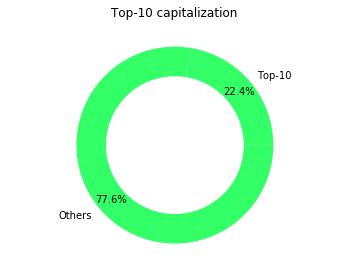

In [52]:
labels = ['Top-10', 'Others']
sizes = [5558445344012, 19307470305388]
explode = (0, 0) 
colors = ['#33ff66']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors,
       pctdistance=0.85) 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Top-10 capitalization', pad=20)
plt.show()

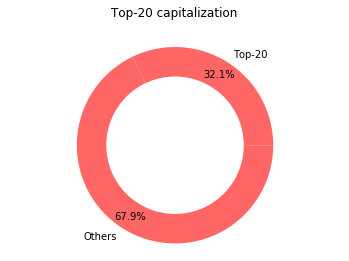

In [53]:
labels = ['Top-20', 'Others']
sizes = [7983976900021, 16881938749379]
explode = (0, 0) 
colors = ['#ff6666']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors,
       pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Top-20 capitalization', pad=20)
plt.show()

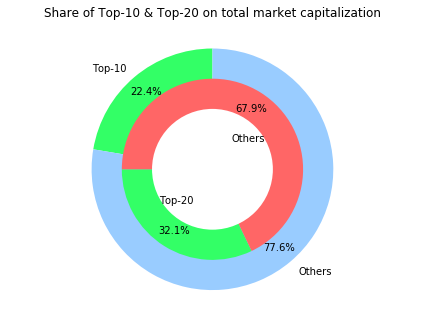

In [57]:
labels_10 = ['Top-10', 'Others']
labels_20 = ['Top-20', 'Others']
colors_10 = ['#33ff66', '#99ccff']
colors_20 = ['#33ff66', '#ff6666']
sizes_10 = [5558445344012, 19307470305388]
sizes_20 = [7983976900021, 16881938749379]
explode_10 = (0, 0) 
explode_20 = (0, 0)

plt.pie(sizes_10, labels=labels_10, colors=colors_10, startangle=90,frame=True, autopct='%1.1f%%', pctdistance=0.85, explode=explode_10)
plt.pie(sizes_20,colors=colors_20, labels=labels_20, radius=0.75,
        startangle=180, autopct='%1.1f%%', pctdistance=0.8, explode=explode_20, labeldistance=0.4)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title('Share of Top-10 & Top-20 on total market capitalization', pad=20)
plt.show()

In [55]:
full_stock.to_csv('./full_stock.csv', index=False)